Zanzibar Gazette Research
========================

This Jupyter Notebook demonstrates the research process for analyzing the Zanzibar Gazette from 1892-1919.

The data was distributed in pdf image scans of the newspaper publications. PDF -> Text conversion is used for text extraction. Text data had low fidelity, so autocorrectors were used to try to clean the data.

In [1]:
%matplotlib inline

# import utility libraries
import os
import subprocess
from os.path import isfile, join

# import data manip libraries
import numpy as np
import pandas as pd

# import language processing libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# import data visualization libraries
import matplotlib.pyplot as plt

# set up data directory name
DATA_DIR = os.getcwd() + "/data/1892-1919"

# NOTE: This Jupyter Notebook should always reside in root dir

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# search for all files in data directory with given extension, add to list of file_names
def file_searcher(ext, directory):
    file_names = []
    for file in os.listdir(directory):
        if file.endswith(ext):
            file_names.append(os.path.join(directory, file))
    return file_names

## PDF -> TXT Conversion
1. Skip these cells if the text information has already been extracted. 
2. The conversion will store raw txt files in the same directory as the pdf files in DATA_DIR

In [3]:
# list of of filenames to be processed
pdf_fnames = file_searcher(".pdf", DATA_DIR)
pdf_fnames.sort()

In [4]:
# convert .pdf files to .txt files 
def convert(files):
    for item in files:
        item_txt = item.split(".")[0] + ".txt"
        subprocess.call(["python3", os.getcwd() + "/utils/pdf2txt.py", item, "-o", item_txt])
        
# uncomment if conversion is needed
# convert(pdf_fnames)

## TXT Processing

1. This will use the autocorrector.py script in utils to process all text data in DATA_DIR.
2. Logs of revised words will be stored in a /log directory for easy access to all changed words.
Revised text files will be stored in a /revised directory for later use in text analysis

In [5]:
# autocorrect and process all .txt data
subprocess.call(["python3", os.getcwd() + "/utils/autocorrecter.py", "--dir", DATA_DIR, "-d", os.getcwd() + "/utils/dictionary.txt"])

KeyboardInterrupt: 

In [6]:
# collect all file names with .txt extension in data directory
# txt_fnames is the list of all file names that we will use from this point forward to conduct analysis on 
txt_fnames = file_searcher(".txt", DATA_DIR + "/revised/")
txt_fnames.sort()
txt_fnames

['/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1892-0224Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1893-0308Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1894-0307Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1895-0306Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1896-0304Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1897-0303Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1898-0302Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1899-0308Revised.txt',
 '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/revised/1900-0307Revised.txt',
 

In [39]:
# analyze the sentiment of each text file, storing the scores sequentially
sentiment = SentimentIntensityAnalyzer()
scores = []

for file in txt_fnames:
    sub_scores = []
    with open(file) as f:
        text = f.read()
        scores.append(sentiment.polarity_scores(text))
scores

[{'compound': 0.9988, 'neg': 0.062, 'neu': 0.858, 'pos': 0.08},
 {'compound': -0.9993, 'neg': 0.097, 'neu': 0.815, 'pos': 0.088},
 {'compound': -0.983, 'neg': 0.076, 'neu': 0.849, 'pos': 0.076},
 {'compound': 0.9999, 'neg': 0.06, 'neu': 0.833, 'pos': 0.107},
 {'compound': 0.9864, 'neg': 0.099, 'neu': 0.799, 'pos': 0.102},
 {'compound': 0.9982, 'neg': 0.074, 'neu': 0.843, 'pos': 0.083},
 {'compound': 1.0, 'neg': 0.07, 'neu': 0.821, 'pos': 0.108},
 {'compound': 1.0, 'neg': 0.055, 'neu': 0.811, 'pos': 0.134},
 {'compound': 0.9988, 'neg': 0.09, 'neu': 0.807, 'pos': 0.103},
 {'compound': 0.9998, 'neg': 0.074, 'neu': 0.823, 'pos': 0.104},
 {'compound': -0.7513, 'neg': 0.084, 'neu': 0.833, 'pos': 0.083},
 {'compound': 0.9962, 'neg': 0.038, 'neu': 0.896, 'pos': 0.066},
 {'compound': 0.9987, 'neg': 0.068, 'neu': 0.85, 'pos': 0.082},
 {'compound': -0.99, 'neg': 0.087, 'neu': 0.831, 'pos': 0.081},
 {'compound': -0.9985, 'neg': 0.096, 'neu': 0.816, 'pos': 0.088},
 {'compound': 0.9993, 'neg': 0.057

In [57]:
# format scores and merge with processed dates in order to visualize
df = pd.DataFrame(scores)

dates = []
for file in txt_fnames:
    date = (file.split(".")[0])[-16:-7]
    dates.append(date)
    
df['dates'] = dates
df

,compound,neg,neu,pos,dates
0,0.9988,0.062,0.858,0.080,1892-0224
1,-0.9993,0.097,0.815,0.088,1893-0308
2,-0.9830,0.076,0.849,0.076,1894-0307
3,0.9999,0.060,0.833,0.107,1895-0306
4,0.9864,0.099,0.799,0.102,1896-0304
5,0.9982,0.074,0.843,0.083,1897-0303
6,1.0000,0.070,0.821,0.108,1898-0302
7,1.0000,0.055,0.811,0.134,1899-0308
8,0.9988,0.090,0.807,0.103,1900-0307
9,0.9998,0.074,0.823,0.104,1901-0306


Text(0.5,0,'date')

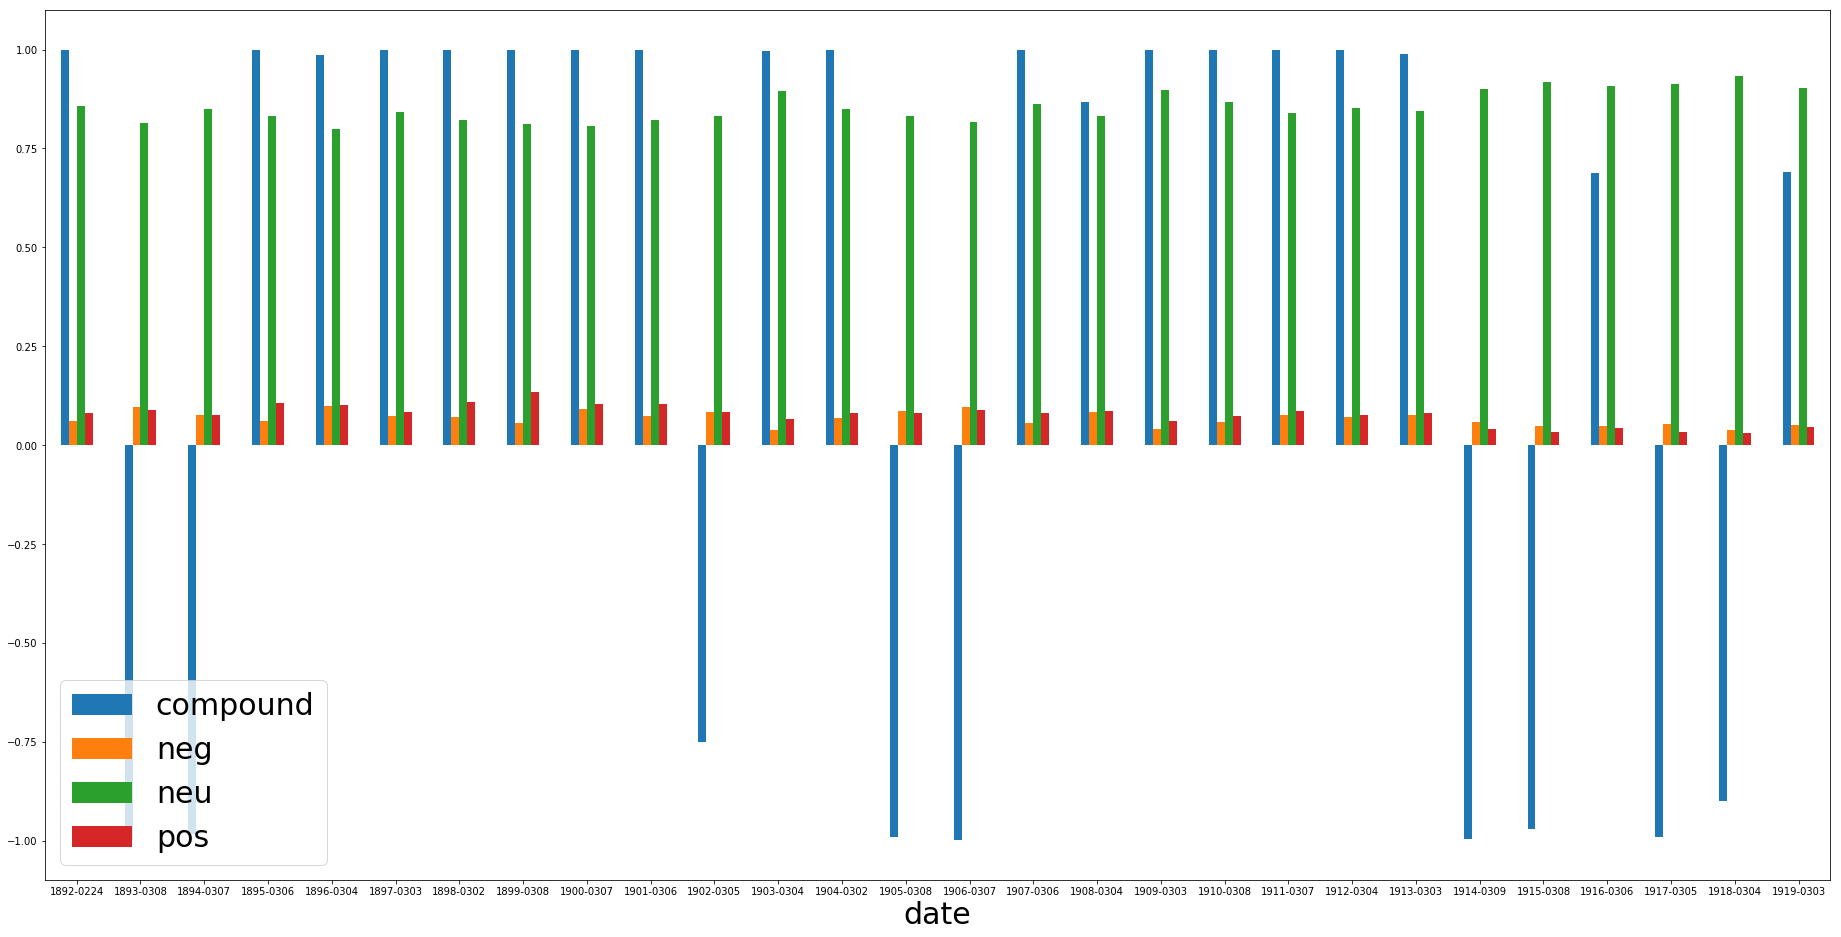

In [59]:
# plot text sentiment analysis findings
df.plot(kind='bar', figsize=(32, 16))
plt.legend(prop={'size': 30})
plt.xticks(np.arange(df.shape[0]), dates, rotation=0, size=10);
plt.xlabel('date', size=30)

In [2]:
import datefinder
import datetime

DIR = '/Users/kernel-ares/Desktop/zanzibar research/zanzibar analysis/data/1892-1919/'

for file in os.listdir(DIR):
    if file.endswith(".txt"):
        with open(os.path.join(DIR, file)) as f:
            dates = []
            text = f.read()
            matches = datefinder.find_dates(text)
            #print(file)
            for match in matches:
                year = match.year
                month = str(match.month)
                day = str(match.day)
                if year > 1890 and year < 1920:
                    year = str(year)
                    
                    if len(month) == 1:
                        month = "0" + month
                    if len(day) == 1:
                        day = "0" + day
                        
                    formatted = year + "-" + month + day
                    dates.append(formatted)
            counts = [[x, dates.count(x)] for x in set(dates)]
            max_occurance = max(counts, key=lambda x: x[1])[0][:10] + ".txt"
            if max_occurance == file:
                print("TRUE")
            else:
                print("FALSE. True: " + file + " Pred: " + max_occurance)


TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE. True: 1906-0307.txt Pred: 1900-0714.txt
TRUE
FALSE. True: 1907-0306.txt Pred: 1907-0313.txt
FALSE. True: 1900-0307.txt Pred: 1900-0314.txt
TRUE
FALSE. True: 1905-0308.txt Pred: 1905-0214.txt
TRUE
TRUE
FALSE. True: 1892-0224.txt Pred: 1892-0714.txt
TRUE
FALSE. True: 1894-0307.txt Pred: 1894-0314.txt
TRUE
FALSE. True: 1895-0306.txt Pred: 1895-0314.txt
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE. True: 1903-0304.txt Pred: 1899-0114.txt
TRUE
FALSE. True: 1902-0305.txt Pred: 1902-0314.txt
